In [1]:


# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#



In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('montebello.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:


# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"



,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
0,26/01/2018,17:00,59,80,10.00,49.3,14.5,100,855.5,0.6,169.5,16.1,100,66,17.0
1,26/01/2018,18:00,60,72,9.23,55.1,14.5,100,855.0,0.0,151.3,16.1,100,66,17.0
2,26/01/2018,19:00,62,77,9.51,45.4,14.9,100,854.2,0.0,182.0,16.7,100,66,17.0
3,26/01/2018,20:00,55,42,7.65,31.7,15.3,100,853.4,0.0,134.2,16.8,99,66,17.0
4,26/01/2018,21:00,62,43,6.13,33.1,15.2,100,852.9,0.0,75.7,16.1,100,66,17.0


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
TEMPCOMB      float64
HUMCOMB         int64
HUMSUBS         int64
TEMPSUBS      float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA
0,59,80,10.00,49.3,14.5,100,855.5,0.6,169.5,16.1,100,66,17.0,2018-01-26 17:00:00
1,60,72,9.23,55.1,14.5,100,855.0,0.0,151.3,16.1,100,66,17.0,2018-01-26 18:00:00
2,62,77,9.51,45.4,14.9,100,854.2,0.0,182.0,16.7,100,66,17.0,2018-01-26 19:00:00
3,55,42,7.65,31.7,15.3,100,853.4,0.0,134.2,16.8,99,66,17.0,2018-01-26 20:00:00
4,62,43,6.13,33.1,15.2,100,852.9,0.0,75.7,16.1,100,66,17.0,2018-01-26 21:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()


,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
count,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,66.250000,74.970238,6.954107,32.647619,14.02619,99.607143,854.059524,0.767857,57.847024,14.584524,99.827381,66.035714,16.797619
std,13.194877,57.164792,2.706544,7.182955,1.74717,1.774860,1.534874,1.551716,107.724105,2.281427,0.717589,0.186132,0.334441
min,33.000000,18.000000,0.950000,15.100000,11.00000,88.000000,850.700000,0.000000,0.000000,11.200000,94.000000,66.000000,16.000000
25%,59.000000,42.000000,5.135000,27.000000,12.80000,100.000000,852.975000,0.000000,0.000000,13.100000,100.000000,66.000000,16.700000
50%,63.000000,58.500000,6.740000,31.300000,14.15000,100.000000,853.950000,0.000000,0.250000,14.550000,100.000000,66.000000,16.800000
75%,71.000000,87.500000,8.437500,37.100000,15.10000,100.000000,855.100000,0.800000,89.225000,15.400000,100.000000,66.000000,17.000000
max,156.000000,357.000000,13.570000,56.500000,18.80000,100.000000,857.700000,10.400000,762.000000,25.000000,100.000000,67.000000,17.300000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS         66.250000
DIRR         74.970238
VELS          6.954107
VELR         32.647619
TEMP         14.026190
HR           99.607143
PB          854.059524
PREC          0.767857
RADSOL       57.847024
TEMPCOMB     14.584524
HUMCOMB      99.827381
HUMSUBS      66.035714
TEMPSUBS     16.797619
dtype: float64

In [11]:


# Calcula el promedio de las Temperaturas
df.TEMP.mean()



14.026190476190479

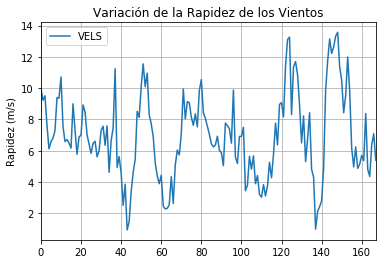

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

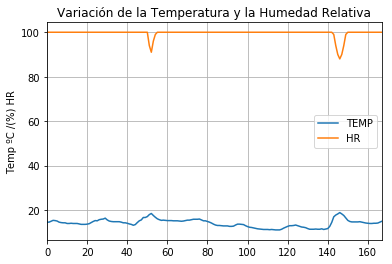

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

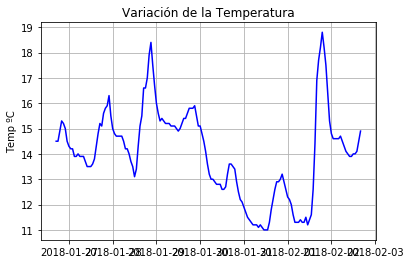

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

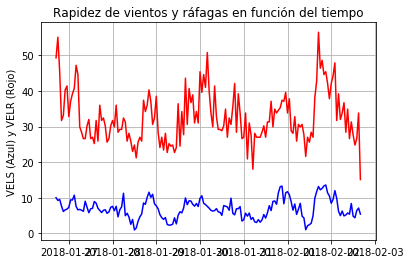

In [15]:
plt.plot_date(x=df.FECHA, y=df.VELS, fmt="b-")
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="r-")
plt.title("Rapidez de vientos y ráfagas en función del tiempo")
plt.ylabel("VELS (Azul) y VELR (Rojo)")
plt.grid(True)
plt.show()

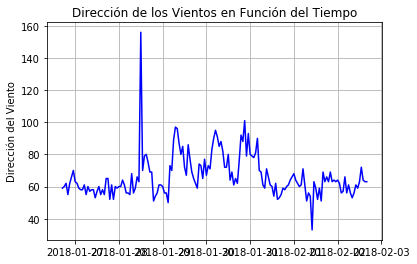

In [16]:
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="b-")
plt.title("Dirección de los Vientos en Función del Tiempo")
plt.ylabel("Dirección del Viento")
plt.grid(True)
plt.show()


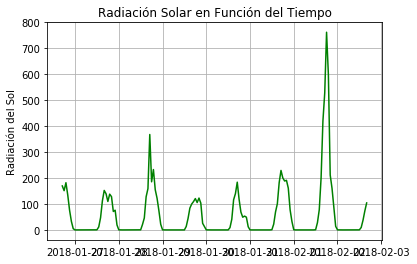

In [17]:
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="g-")
plt.title("Radiación Solar en Función del Tiempo")
plt.ylabel("Radiación del Sol")
plt.grid(True)
plt.show()


In [18]:
df2 = df.loc[7:30, ['FECHA', 'TEMP']]

In [19]:
tmin = df2.min()

In [20]:
tmax = df2.max()

In [21]:
tmax - tmin


FECHA    0 days 23:00:00
TEMP                 2.8
dtype: object

In [22]:
df3 = df.loc[7:30, ['TEMP', 'HR']]

In [23]:
df3


,TEMP,HR
7,14.3,100
8,14.2,100
9,14.2,100
10,13.9,100
11,13.9,100
12,14.0,100
13,13.9,100
14,13.9,100
15,13.9,100
16,13.7,100


In [24]:
print("Existe una relación muy estrecha entre temperatura y humedad relativa. Usualmente la temperatura medida en termómetros, ya sean analógicos o digitales, es denominada temperatura de bulbo seco. Ésta se relaciona inversamente proporcional con la llamada humedad relativa en el aire, que representa el porentaje respecto al punto de rocío o saturación, que representa el 100% de humedad relativa. Cada vez que la temperatura sube, la humedad relativa baja y viceversa. Hay una variación notable en la humedad relativa ya que ésta baja o sube un 25% cada vez que la temperatura cambia 11°.")

Existe una relación muy estrecha entre temperatura y humedad relativa. Usualmente la temperatura medida en termómetros, ya sean analógicos o digitales, es denominada temperatura de bulbo seco. Ésta se relaciona inversamente proporcional con la llamada humedad relativa en el aire, que representa el porentaje respecto al punto de rocío o saturación, que representa el 100% de humedad relativa. Cada vez que la temperatura sube, la humedad relativa baja y viceversa. Hay una variación notable en la humedad relativa ya que ésta baja o sube un 25% cada vez que la temperatura cambia 11°.


In [25]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
count,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,66.250000,74.970238,6.954107,32.647619,14.02619,99.607143,854.059524,0.767857,57.847024,14.584524,99.827381,66.035714,16.797619
std,13.194877,57.164792,2.706544,7.182955,1.74717,1.774860,1.534874,1.551716,107.724105,2.281427,0.717589,0.186132,0.334441
min,33.000000,18.000000,0.950000,15.100000,11.00000,88.000000,850.700000,0.000000,0.000000,11.200000,94.000000,66.000000,16.000000
25%,59.000000,42.000000,5.135000,27.000000,12.80000,100.000000,852.975000,0.000000,0.000000,13.100000,100.000000,66.000000,16.700000
50%,63.000000,58.500000,6.740000,31.300000,14.15000,100.000000,853.950000,0.000000,0.250000,14.550000,100.000000,66.000000,16.800000
75%,71.000000,87.500000,8.437500,37.100000,15.10000,100.000000,855.100000,0.800000,89.225000,15.400000,100.000000,66.000000,17.000000
max,156.000000,357.000000,13.570000,56.500000,18.80000,100.000000,857.700000,10.400000,762.000000,25.000000,100.000000,67.000000,17.300000
